
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('accel.dat')
# sampling frequency of the signal is 500 Hz
fs = 40
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is an acceleration signal measured at the wrist.<br>
    The signal records the acceleration during the hand washing protocol in an<br>
    hospital. The goal is to detect the hand washing sequence.<br>
    The hand washing protocol produced rhythmical movements.<br>
    The protocol is known to take place between 20 and 30 seconds.<br>



 <br>
    Plot time signal.<br>
    Q: Comment the figure.<br>
    
   <span style="color:blue"> The acceleration signal remains relatively steady during
 the first ~20 seconds, showing only small fluctuations around a constant baseline. At around 20
 seconds a marked transition occurs: the amplitude increases sharply and the waveform becomes
 clearly rhythmic, indicating the start of the hand-washing sequence. Between ~22 and ~30 seconds
 the activity is sustained, with frequent bursts and pronounced excursions, such as the large drop
 near 30 seconds, that reflect the vigorous and repetitive strokes typical of the washing protocol.
 After 30 seconds the signal amplitude decreases and its variability reduces, marking the conclusion
 of the hand-washing protocol. This temporal pattern clearly isolates the washing sequence as a
 distinct, high-energy episode embedded within two other quieter signal segments.


Compute the FFT of the signal

In [3]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

Text(0.5, 1.0, 'acceleration signal signal')

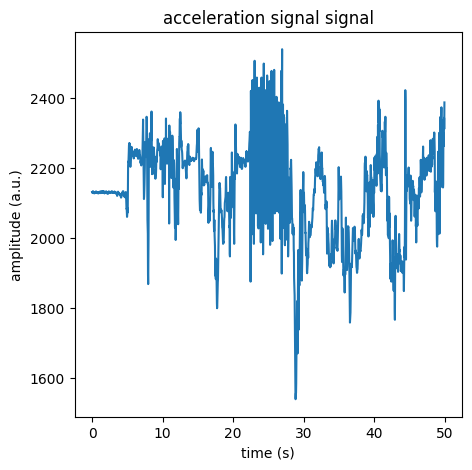

In [4]:
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('acceleration signal signal')


 <br>
    High pass the signal.<br>
    Q: Comment the figure.<br>
   <span style="color:blue">After applying a high-pass filter at 0.5 Hz, the wrist
 acceleration signal changes noticeably. The raw signal contained both fast hand movements and slow
 variations due to posture, sensor noise, or gravity, which made the hand washing sequence harder
 to see. The filter removes these slow components and highlights the faster, rhythmic ones. In the
 top plot, between 20 and 30 seconds, the signal shows a clearer oscillatory pattern, corresponding to hand washing. The zoomed view further emphasizes this periodicity with compact, regular
 oscillations. In short, the high-pass filter cleans the signal from low-frequency noise and brings out
 the hand washing rhythm, making it much easier to detect.


high-pass filter with cutoff frequency of 0.5 Hz

In [5]:
b, a = sp.butter(4, 0.5/fs*2, btype='high')
# zero-phase filtering of the signal
x_hp = sp.filtfilt(b, a, x)

(20.0, 30.0)

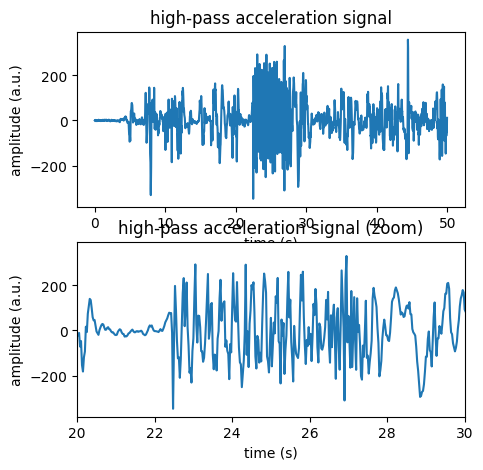

In [6]:
py.figure(2, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal (zoom)')
py.xlim(20, 30)


<br>
    Band pass the signal between 2.4 and 3.2 Hz.<br>
    Q: Based on previous figure, comment the selection of the frequencies.<br>
    
<span style="color:blue">The band-pass filtered signal between 2.4 and 3.2 Hz represents the dominant
 oscillatory component of the wrist accelerometer during the handwashing task. This frequency
 range corresponds to the repetitive wrist and hand movements that occur during scrubbing, rinsing,
 and rubbing, typically performed at a rate of about 2–3 cycles per second. After filtering, only the
 components of the signal within this frequency band are preserved, meaning that slow movements
 (e.g., posture changes, drift, or low-frequency noise) and high-frequency components (e.g., tremors,
 sensor noise, or sharp micro-motions) are suppressed. What remains is the periodic rhythmic
 motion of the wrist, which characterizes the core mechanical pattern of handwashing.

Q: Why zero phase filter (filtfilt) is used?<br>

<span style="color:blue">A zero-phase filter such as filtfilt is applied to avoid
 phase distortion. When a causal filter is used in the forward direction only, the output is delayed
 by the filter’s group delay, causing a temporal shift of peaks and relevant features. By filtering the
 signal forward and backward, this delay is cancelled and the overall phase response becomes zero,
 ensuring that the morphology and timing of the hand-washing signal are preserved.


Analogic limit of the passband frequency

In [7]:
f_pass = np.array([2.4, 3.2])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 5])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x_hp)

c:\Users\alexb\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\signal\_filter_design.py:4137: RuntimeWarning: divide by zero encountered in divide
  nat = ((stopb ** 2 - passb[0] * passb[1]) /


(20.0, 30.0)

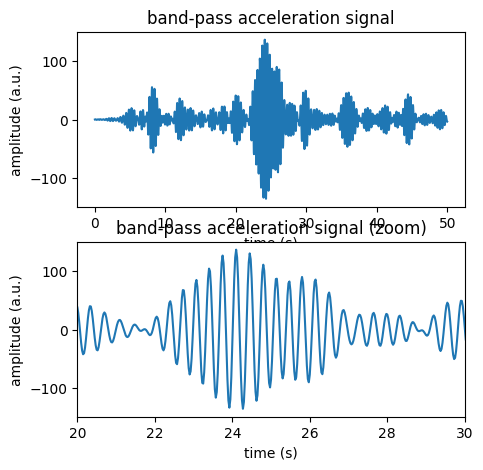

In [8]:
py.figure(3, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal (zoom)')
py.xlim(20, 30)


<br>
    Low-pass filter of the power of the band-pass signal.<br>
    Q: Why use the power of the acceleration signal?<br>
    
<span style="color:blue">When the wrist acceleration signal is observed directly, it appears as a waveform os
cillating around zero with both positive and negative values. This makes it difficult to assess the
 intensity of the motor activity, since positive and negative contributions tend to cancel each other
 out. By computing the power of the signal (i.e., by squaring it), an always positive measure is
 obtained that directly reflects the energy of the movement. This representation makes it easier to
 identify periods of greater activity, such as the hand washing sequence, which corresponds to a
 clear increase in power compared to intervals of rest or minor movements. 

Q: How the detection of hand washing is obtained?<br>

<span style="color:blue">The detection process begins with the band-pass filtered acceleration
 signal, in order to isolate the frequencies typical of the rhythmic hand washing movement. The
 power of this signal is then computed, providing an instantaneous measure of movement intensity.
 Since the raw power remains noisy, a low-pass filter is applied to smooth the trend and produce a
 more regular curve. In this filtered curve, hand washing appears as a clear and localized peak. At
 this stage, a threshold is defined: when the power exceeds the threshold, the system detects that
 hand washing is taking place; when the power falls below the threshold, the activity is considered
 f
 inished. In the plot, this detection is represented by the orange line, which rises clearly between
 20 and 30 seconds, exactly during the interval of hand washing



Analogic limit of the passband frequency

In [9]:
f_pass = 0.4
# Analogic limit of the stopband frequency
f_stop = 0.8
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_pow = sp.filtfilt(b ,a, x_bp**2)
# detection
det = x_pow > 2000

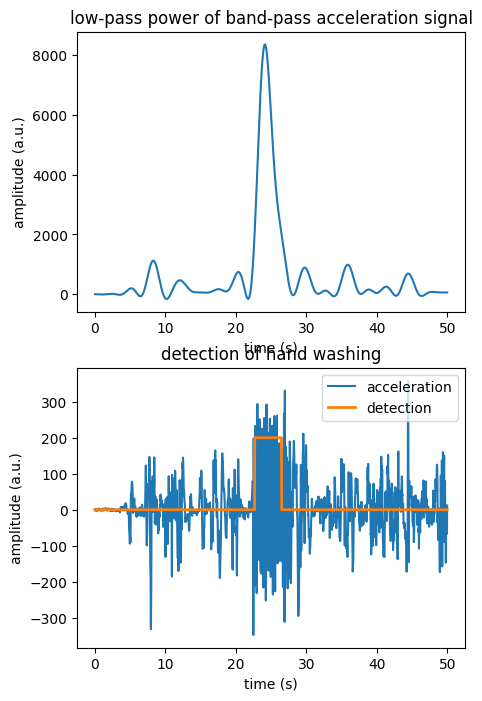

In [10]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_pow)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('low-pass power of band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp, label='acceleration')
py.plot(t, det*200, linewidth=2, label='detection')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('detection of hand washing')
py.legend(loc='upper right')